# Exploratory Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
errors = pd.read_csv('data/PdM_errors.csv')
failures = pd.read_csv('data/PdM_failures.csv')
machines = pd.read_csv('data/PdM_machines.csv')
maint = pd.read_csv('data/PdM_maint.csv')
telemetry = pd.read_csv('data/PdM_telemetry.csv')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
print(f'telemetry Size: {len(telemetry)}')
print(f'machines Size: {len(machines)}')
print(f'errors Size: {len(errors)}')
print(f'failures Size: {len(failures)}')
print(f'maintenance Size: {len(maint)}\n')
print(f'telemetry columns: {telemetry.columns}')
print(f'machines columns: {machines.columns}')
print(f'errors columns: {errors.columns}')
print(f'failures columns: {failures.columns}')
print(f'maintenance columns: {maint.columns}')


telemetry Size: 876100
machines Size: 100
errors Size: 3919
failures Size: 761
maintenance Size: 3286

telemetry columns: Index(['datetime', 'machineID', 'volt', 'rotate', 'pressure', 'vibration'], dtype='object')
machines columns: Index(['machineID', 'model', 'age'], dtype='object')
errors columns: Index(['datetime', 'machineID', 'errorID'], dtype='object')
failures columns: Index(['datetime', 'machineID', 'failure'], dtype='object')
maintenance columns: Index(['datetime', 'machineID', 'comp'], dtype='object')


### EDA on telemetry data (time series)

In [108]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [37]:
telemetry.describe()

,datetime,machineID,volt,rotate,pressure,vibration
count,876100,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,2015-07-02 18:00:00,50.500000,170.777736,446.605119,100.858668,40.385007
min,2015-01-01 06:00:00,1.000000,97.333604,138.432075,51.237106,14.877054
25%,2015-04-02 12:00:00,25.750000,160.304927,412.305714,93.498181,36.777299
50%,2015-07-02 18:00:00,50.500000,170.607338,447.558150,100.425559,40.237247
75%,2015-10-02 00:00:00,75.250000,181.004493,482.176600,107.555231,43.784938
max,2016-01-01 06:00:00,100.000000,255.124717,695.020984,185.951998,76.791072
std,NaN,28.866087,15.509114,52.673886,11.048679,5.370361


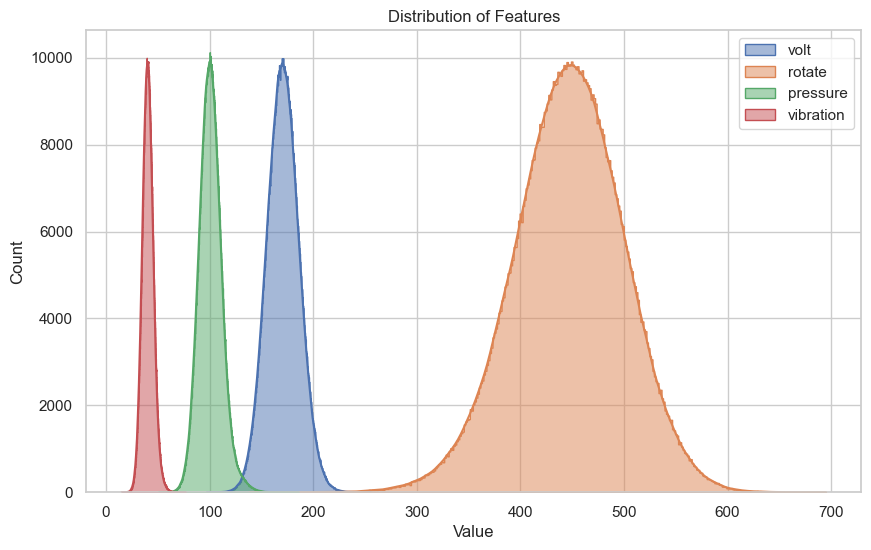

In [22]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'])

# Plot styles
sns.set(style='whitegrid')

# Distribution of vibration
plt.figure(figsize=(10, 6))
# sns.histplot(telemetry['vibration'], kde=True)

for column in telemetry.columns[2:]:
    # plt.plot(telemetry['datetime'], telemetry[column], label=column)
    sns.histplot(telemetry[column], kde=True, label=column, element="step", common_norm=False)
plt.title('Distribution of Features')
plt.xlabel('Value')
plt.ylabel('Count')
plt.legend()
plt.show()



### EDA on failures/errors

#### Notice that failures are not included in errors

In [7]:
failures.iloc[0:10, :]

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4
5,2015-10-17 06:00:00,1,comp2
6,2015-12-16 06:00:00,1,comp4
7,2015-03-19 06:00:00,2,comp1
8,2015-03-19 06:00:00,2,comp2
9,2015-04-18 06:00:00,2,comp2


In [8]:
errors.iloc[0:10, :]

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4
5,2015-01-25 15:00:00,1,error4
6,2015-01-27 04:00:00,1,error1
7,2015-03-03 22:00:00,1,error2
8,2015-03-05 06:00:00,1,error1
9,2015-03-20 18:00:00,1,error1


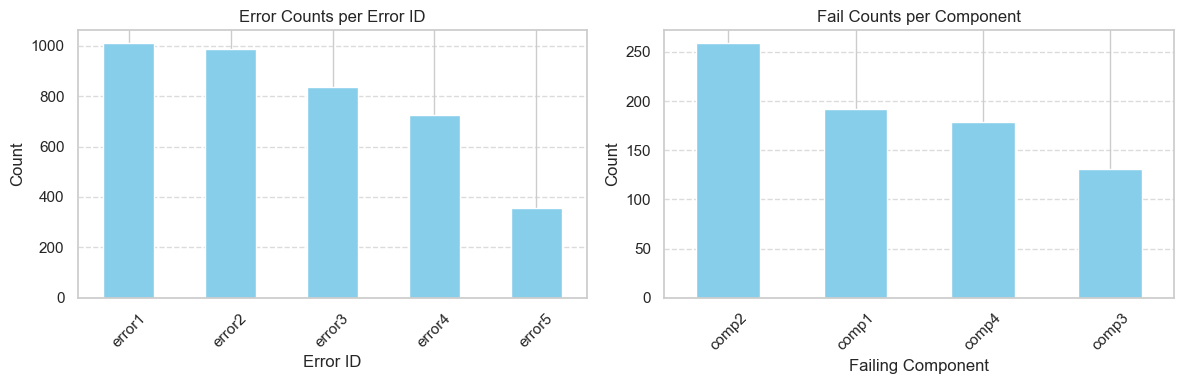

In [40]:
# Error counts
error_counts = errors['errorID'].value_counts()
failure_counts = failures['failure'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# error counts
error_counts.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Error Counts per Error ID')
axes[0].set_xlabel('Error ID')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# failure counts
failure_counts.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('Fail Counts per Component')
axes[1].set_xlabel('Failing Component')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


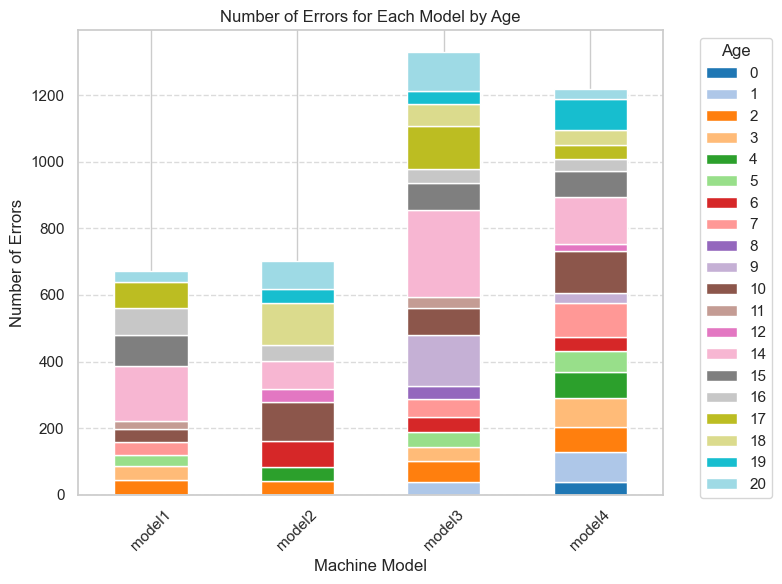

In [44]:
errors_machines = pd.merge(errors, machines, on='machineID')

# groupby model and age --> count # of errors
error_counts_by_model_age = errors_machines.groupby(['model', 'age']).size().reset_index(name='error_count')

# pivot table for stacked bar chart
pivot_table = error_counts_by_model_age.pivot(index='model', columns='age', values='error_count').fillna(0)

pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20')
plt.title('Number of Errors for Each Model by Age')
plt.xlabel('Machine Model')
plt.ylabel('Number of Errors')
plt.xticks(rotation=45)
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Failure occurence

Failures are marked with a vertical red line, while maintenance is marked with a dashed vertical green line

Most maintenance seems to be reactive (occurs when a failure happens), and not preventative.

However, we can see some instances in which regular maintenance has stopped a failure from occuring.

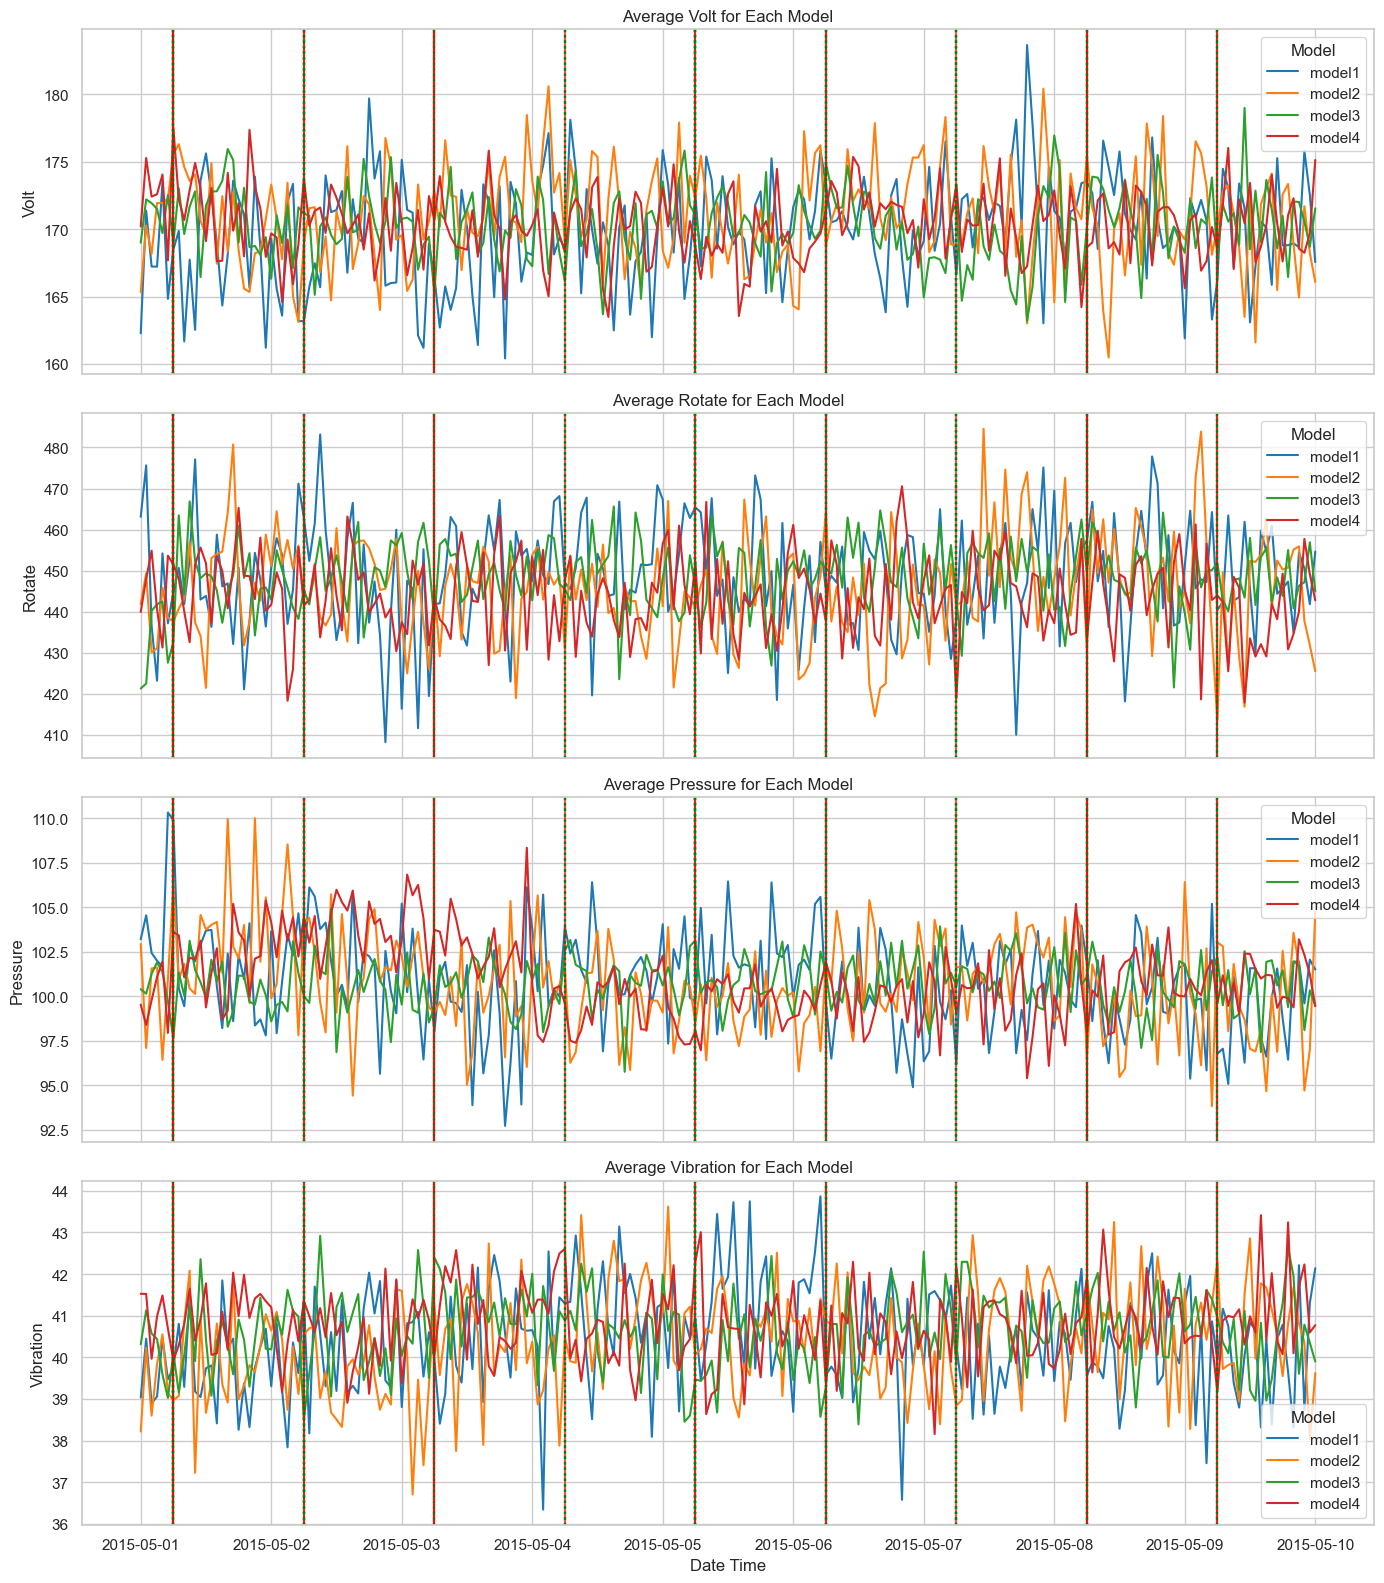

In [94]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'])
failures['datetime'] = pd.to_datetime(failures['datetime'])
maint['datetime'] = pd.to_datetime(maint['datetime'])

# Merge telemetry with machines to get model types
telemetry_with_model = pd.merge(telemetry, machines, on='machineID')

# Specify the time window
start_date = '2015-05-01'
end_date = '2015-05-10'
telemetry_filtered = telemetry_with_model[(telemetry_with_model['datetime'] >= start_date) & (telemetry_with_model['datetime'] <= end_date)]

# Calculate average values for each telemetry feature grouped by model type and datetime
average_telemetry = telemetry_filtered.groupby(['datetime', 'model']).mean().reset_index()

# Merge failures and maintenance with machines to get model types for each event
failures_with_model = pd.merge(failures, machines, on='machineID')
maint_with_model = pd.merge(maint, machines, on='machineID')

# Filter the events to include only those within the time window
failures_filtered = failures_with_model[(failures_with_model['datetime'] >= start_date) & (failures_with_model['datetime'] <= end_date)]
maint_filtered = maint_with_model[(maint_with_model['datetime'] >= start_date) & (maint_with_model['datetime'] <= end_date)]

telemetry_features = ['volt', 'rotate', 'pressure', 'vibration']
models = telemetry_with_model['model'].unique()

fig, axs = plt.subplots(len(telemetry_features), 1, figsize=(14, 16), sharex=True)

for i, feature in enumerate(telemetry_features):
    ax = axs[i]
    sns.lineplot(data=average_telemetry, x='datetime', y=feature, hue='model', ax=ax, palette='tab10')
    ax.set_title(f'Average {feature.capitalize()} for Each Model')
    ax.set_xlabel('Date Time')
    ax.set_ylabel(f'{feature.capitalize()}')
    
    # vertical lines for failures and maintenances
    for model in models:
        model_failures = failures_filtered[failures_filtered['model'] == model]
        for failure_time in model_failures['datetime']:
            ax.axvline(failure_time, color='red', linestyle='-', alpha=0.7)

        model_maint = maint_filtered[maint_filtered['model'] == model]
        for maint_time in model_maint['datetime']:
            ax.axvline(maint_time, color='green', linestyle=':', alpha=0.7)        
    
    ax.legend(title='Model')

plt.tight_layout()
plt.show()

#### Failure Occurence for one machine

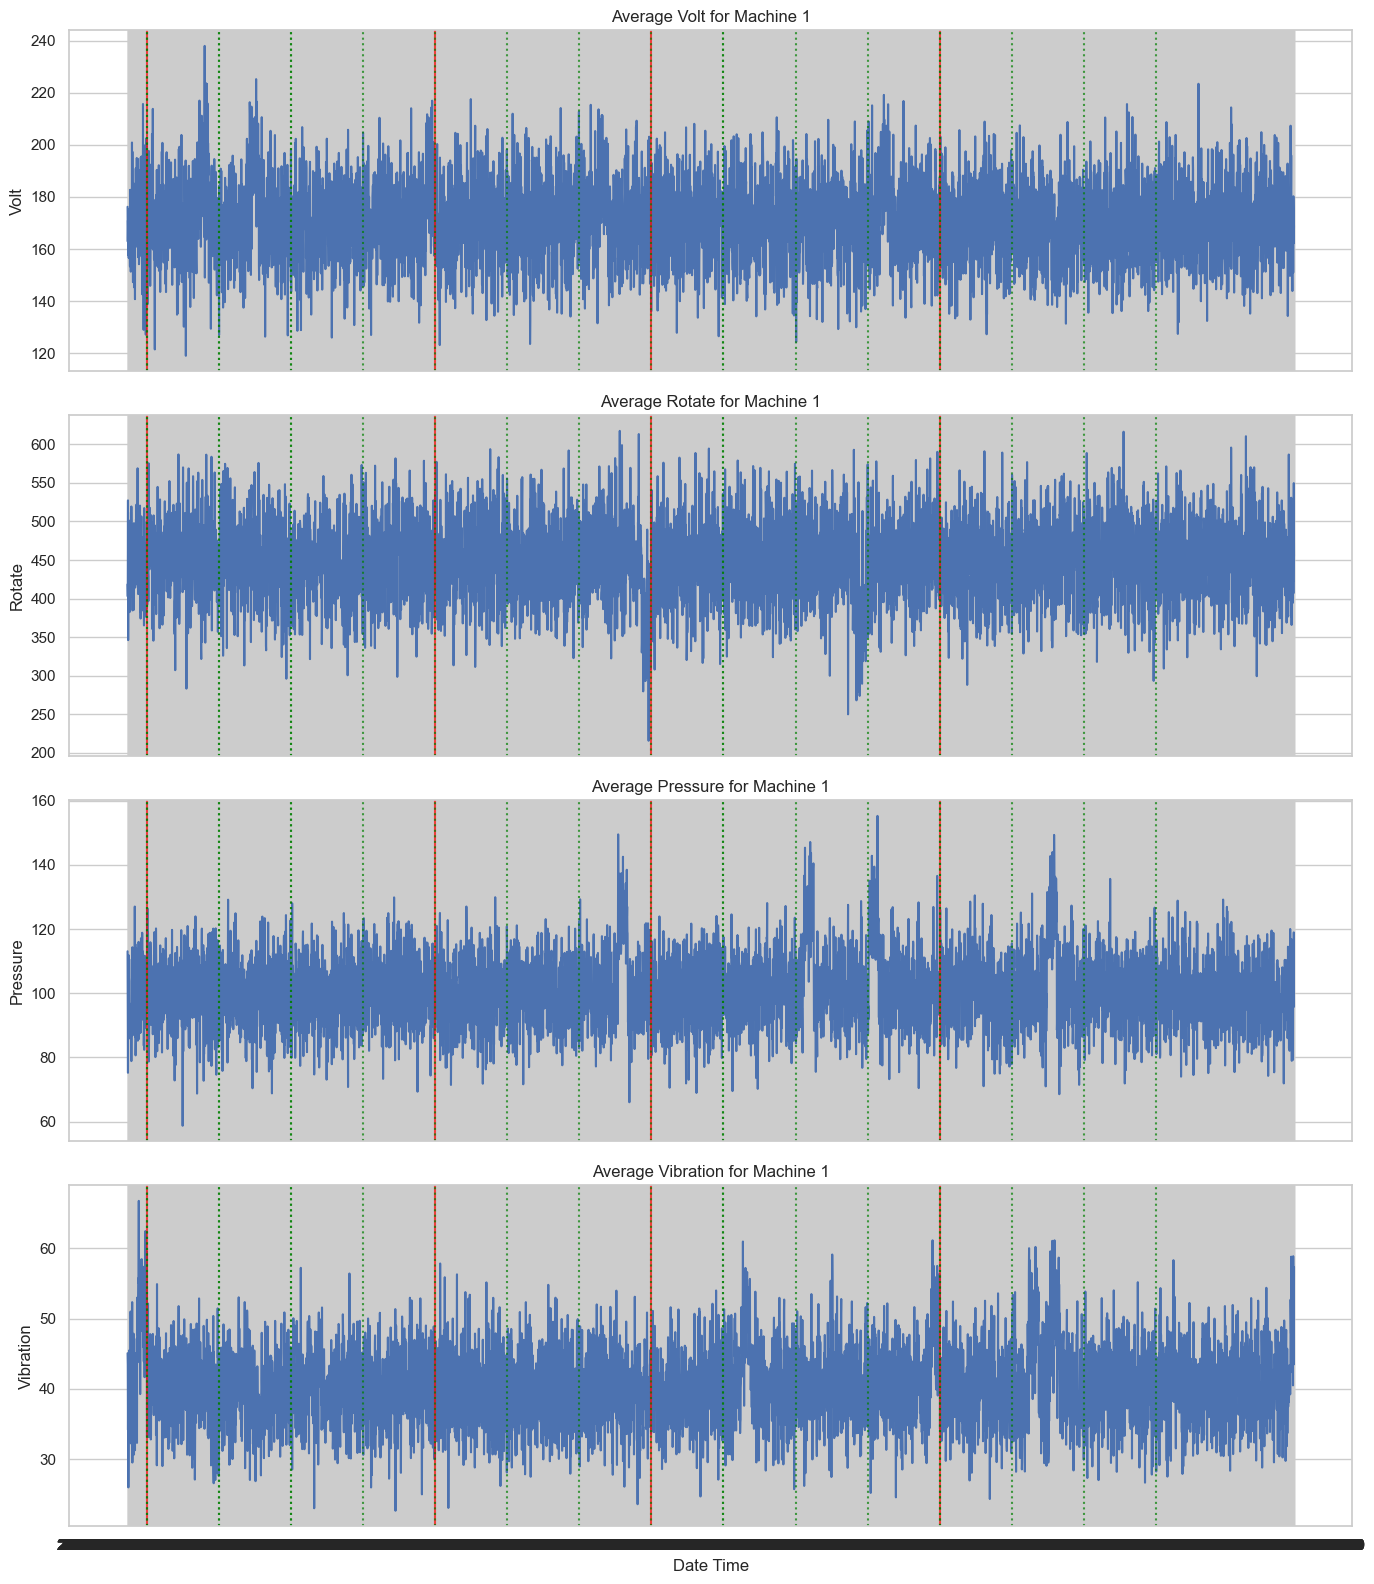

In [132]:
# Specify the machineID and time window
machine_id = 1  # Replace with the specific machineID you are interested in
start_date = '2015-01-01'
end_date = '2015-09-01'

# Filter telemetry data for the specific machineID and time window
telemetry_filtered = telemetry_with_model[(telemetry_with_model['machineID'] == machine_id) &
                                          (telemetry_with_model['datetime'] >= start_date) &
                                          (telemetry_with_model['datetime'] <= end_date)]

# Filter the events to include only those within the time window and for the specific machineID
failures_filtered = failures_with_model[(failures_with_model['machineID'] == machine_id) &
                                        (failures_with_model['datetime'] >= start_date) &
                                        (failures_with_model['datetime'] <= end_date)]
maint_filtered = maint_with_model[(maint_with_model['machineID'] == machine_id) &
                                  (maint_with_model['datetime'] >= start_date) &
                                  (maint_with_model['datetime'] <= end_date)]

telemetry_features = ['volt', 'rotate', 'pressure', 'vibration']

fig, axs = plt.subplots(len(telemetry_features), 1, figsize=(14, 16), sharex=True)

for i, feature in enumerate(telemetry_features):
    ax = axs[i]
    sns.lineplot(data=telemetry_filtered, x='datetime', y=feature, ax=ax)
    ax.set_title(f'Average {feature.capitalize()} for Machine {machine_id}')
    ax.set_xlabel('Date Time')
    ax.set_ylabel(f'{feature.capitalize()}')
    
    # vertical lines for failures and maintenances
    for failure_time in failures_filtered['datetime']:
        ax.axvline(failure_time, color='red', linestyle='-', alpha=0.7)

    for maint_time in maint_filtered['datetime']:
        ax.axvline(maint_time, color='green', linestyle=':', alpha=0.7)
    
plt.tight_layout()
plt.show()

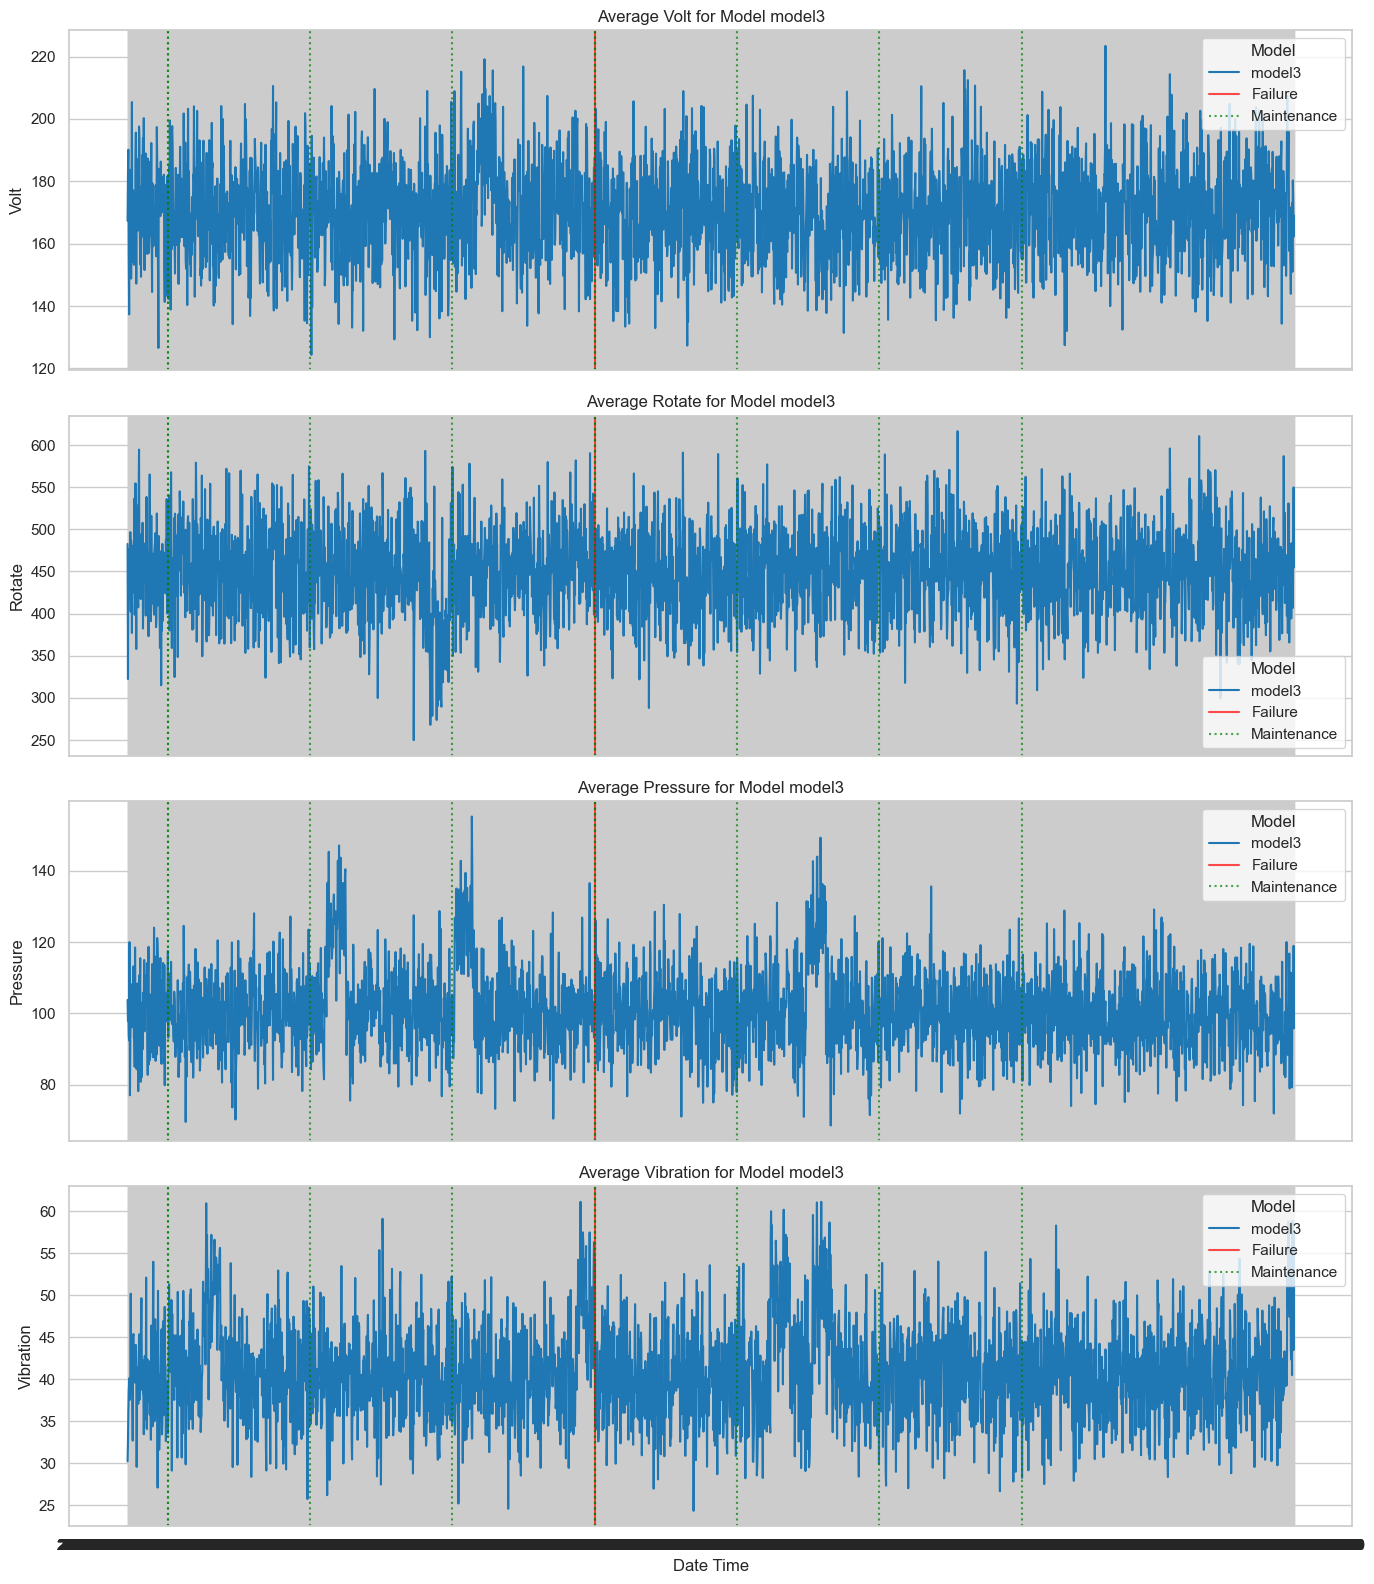

In [135]:
telemetry_with_model = pd.merge(telemetry, machines, on='machineID')

# Specify the time window and machineID
start_date = '2015-05-01'
end_date = '2015-09-01'
machine_id = 1  # Specify the machineID you want to focus on

# Filter the telemetry data for the specific machineID and time window
telemetry_filtered = telemetry_with_model[(telemetry_with_model['datetime'] >= start_date) & 
                                          (telemetry_with_model['datetime'] <= end_date) &
                                          (telemetry_with_model['machineID'] == machine_id)]

# Calculate average values for each telemetry feature grouped by datetime
average_telemetry = telemetry_filtered.groupby(['datetime', 'model']).mean().reset_index()

# Merge failures and maintenance with machines to get model types for each event
failures_with_model = pd.merge(failures, machines, on='machineID')
maint_with_model = pd.merge(maint, machines, on='machineID')

# Filter the events for the specific machineID and time window
failures_filtered = failures_with_model[(failures_with_model['datetime'] >= start_date) & 
                                        (failures_with_model['datetime'] <= end_date) &
                                        (failures_with_model['machineID'] == machine_id)]
maint_filtered = maint_with_model[(maint_with_model['datetime'] >= start_date) & 
                                  (maint_with_model['datetime'] <= end_date) &
                                  (maint_with_model['machineID'] == machine_id)]

# Plotting
telemetry_features = ['volt', 'rotate', 'pressure', 'vibration']
model = telemetry_filtered['model'].unique()[0]

fig, axs = plt.subplots(len(telemetry_features), 1, figsize=(14, 16), sharex=True)

for i, feature in enumerate(telemetry_features):
    ax = axs[i]
    sns.lineplot(data=average_telemetry, x='datetime', y=feature, hue='model', ax=ax, palette='tab10')
    ax.set_title(f'Average {feature.capitalize()} for Model {model}')
    ax.set_xlabel('Date Time')
    ax.set_ylabel(f'{feature.capitalize()}')
    
    # Plot vertical lines for failures
    for failure_time in failures_filtered['datetime']:
        ax.axvline(failure_time, color='red', linestyle='-', alpha=0.7, label='Failure' if failure_time == failures_filtered['datetime'].iloc[0] else "")
    
    # Plot vertical lines for maintenances
    for maint_time in maint_filtered['datetime']:
        ax.axvline(maint_time, color='green', linestyle=':', alpha=0.7, label='Maintenance' if maint_time == maint_filtered['datetime'].iloc[0] else "")
    
    # To avoid duplicate labels in the legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), title='Model')

plt.tight_layout()
plt.show()
